In [1]:
import IPython
from scipy.io import wavfile
from scipy.io.wavfile import write

import matplotlib.pyplot as plt
import numpy as np

Sample rate is the number of samples taken at every second from an audio.
And 

Size of s is 66150 and rate is 22050
Duration is 3.0 seconds


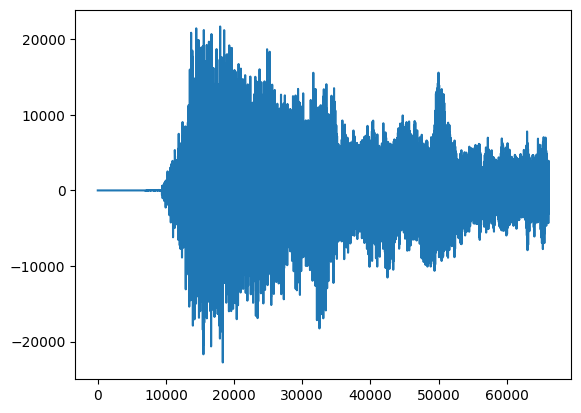

In [2]:
rate, s = wavfile.read('./temp/StarWars3.wav')
plt.plot(s);

print(f'Size of s is {len(s)} and rate is {rate}')
print(f'Duration is {len(s) / rate} seconds')
IPython.display.Audio(s, rate=rate)

## Generating sound

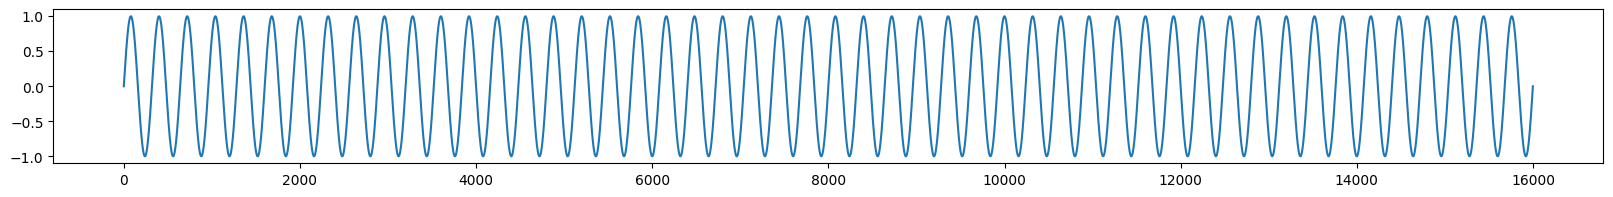

In [3]:
rate = 16000
seconds = 1
frequency = 50
time = np.linspace(0, 1, rate * seconds)
s = np.sin(frequency * 2 * np.pi * time)
fig = plt.figure(figsize=(20, 2))
plt.plot(s)
IPython.display.Audio(s, rate=rate)

## Hearing Test

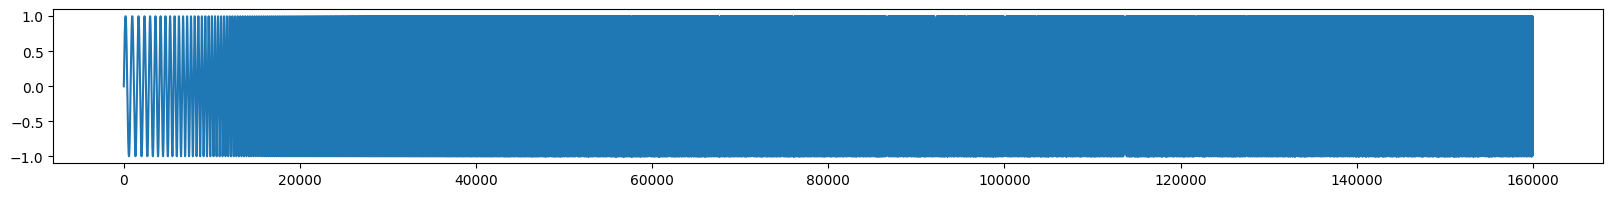

In [4]:
rate = 16000
seconds = 10

time = np.linspace(0, seconds, rate * seconds)

start_freq = 20
end_freq = 20000

freqs = np.logspace(np.log10(start_freq), np.log10(end_freq), len(time))
s = np.sin(2 * np.pi * freqs * time)

plt.figure(figsize=(20, 2))
plt.plot(s);

IPython.display.Audio(s, rate=rate)

## Amplitude

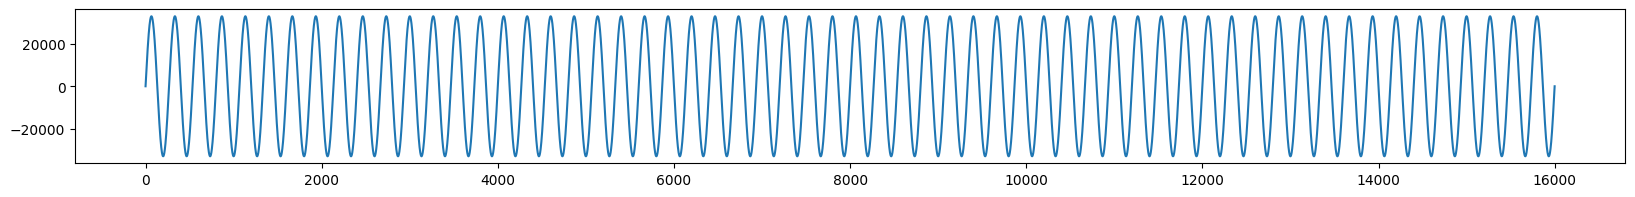

In [5]:
rate = 16000
freqs = 60
duration = 1

time = np.linspace(0, 1 * duration, duration * rate)
amplitude = np.iinfo(np.int16).max
s = np.sin(2 * np.pi * time * freqs) * amplitude

plt.figure(figsize=(20, 2))
plt.plot(s);

IPython.display.Audio(s, rate=rate)

## Adding sigals

In [6]:
def generate_signal(freq, duration, amplitude, rate=16000, plot=True):
    time = np.linspace(0, 1 * duration, duration * rate)
    s = np.sin(2 * np.pi * freq * time) * amplitude

    if plot:
        plt.figure(figsize=(20, 2))
        plt.plot(s);
    return s

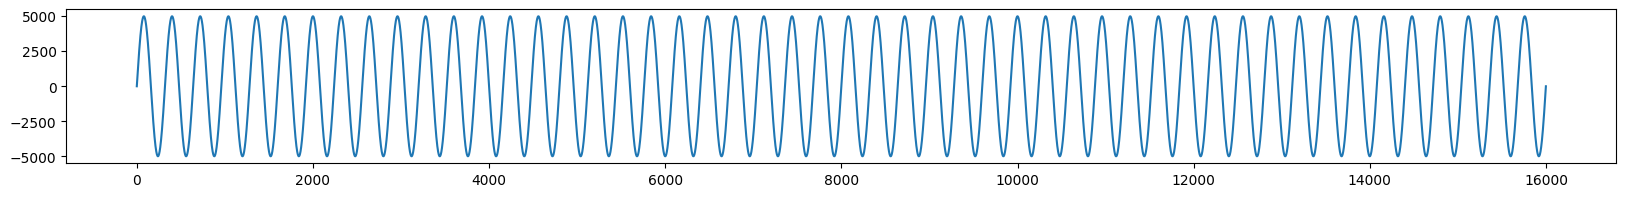

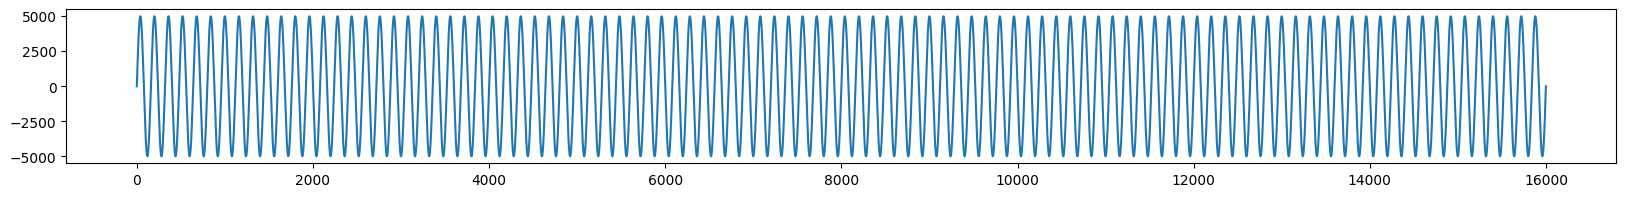

In [7]:
signal_1 = generate_signal(50, 1, 5000)
signal_2 = generate_signal(100, 1, 5000)

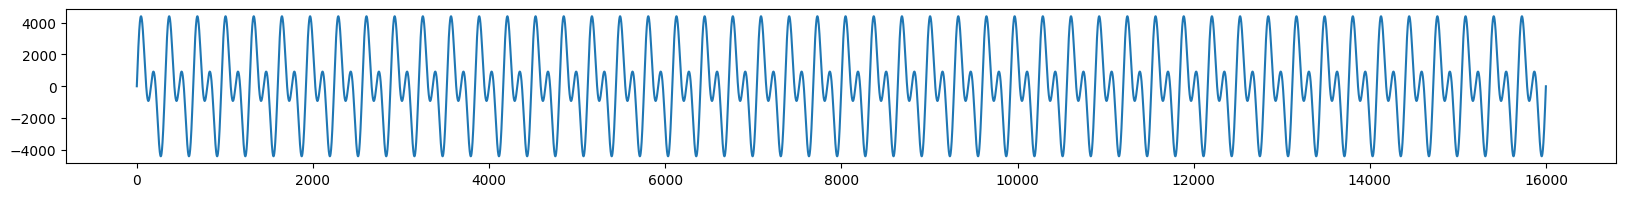

In [8]:
added_signals = (signal_1 + signal_2) / 2
plt.figure(figsize=(20, 2))
plt.plot(added_signals);

IPython.display.Audio(added_signals, rate=rate)

## Using Fourier to seperate signals

In [9]:
from scipy.fft import fft, fftfreq

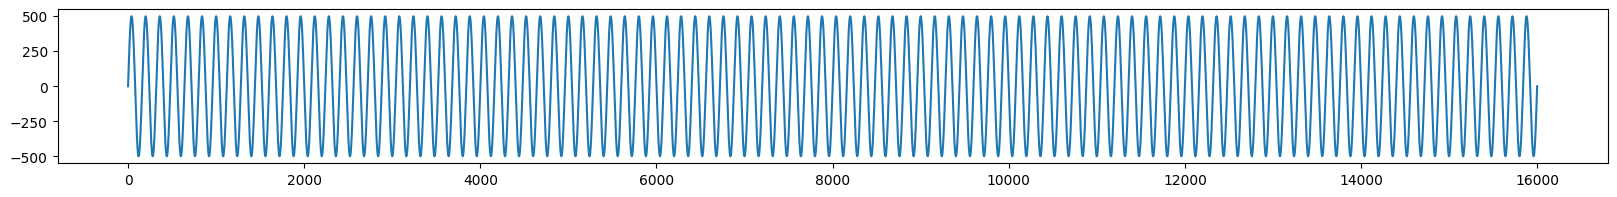

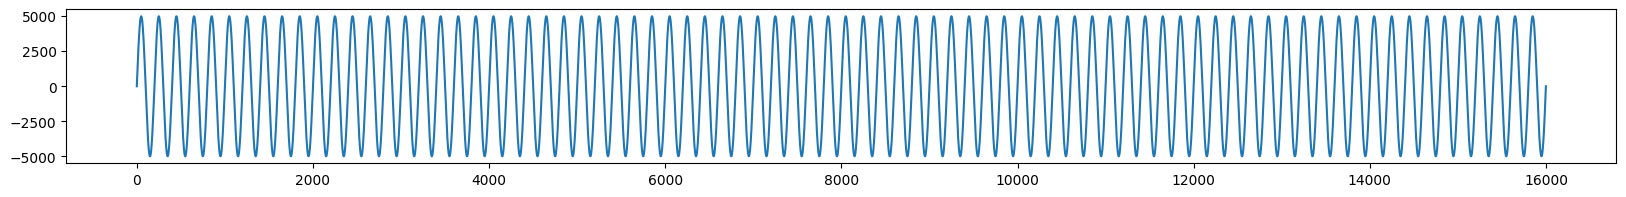

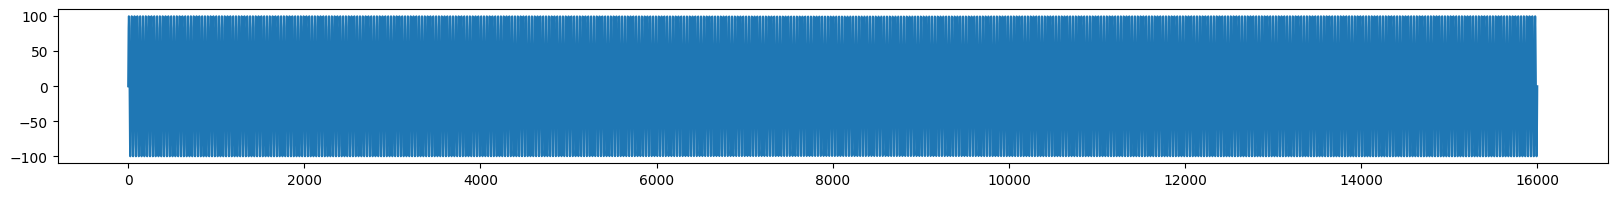

In [12]:
N = 1600 # sample points
T = np.arange(0, 1, 1 / N)

data = generate_signal(100, 1, 500) + generate_signal(80, 1, 5000) + generate_signal(500, 1, 100)
yf = fft(data)
xf = fftfreq(N, 1/N)[0:N//2]

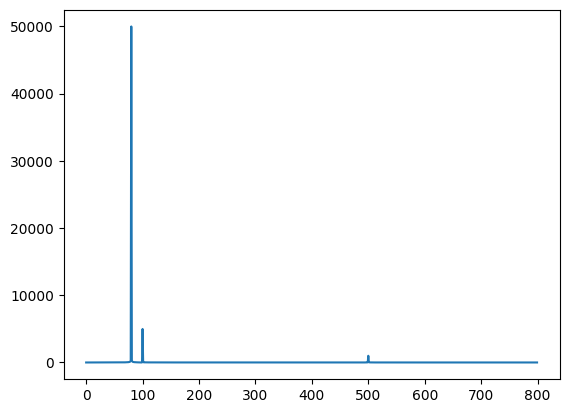

In [13]:
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

## Spectogram

In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '20'

import tensorflow as tf

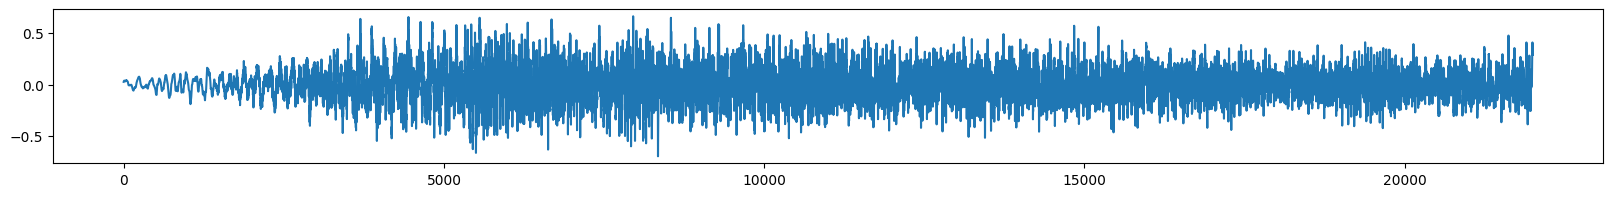

In [41]:
file = tf.io.read_file('./temp/StarWars3.wav')
waveform, sample_rate = tf.audio.decode_wav(file, desired_samples=16000 * 2)
waveform = waveform[10000:]
waveform = np.squeeze(waveform, axis=-1)
plt.figure(figsize=(20, 2))
plt.plot(waveform);

In [42]:
spectogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)
spectogram = tf.abs(spectogram)

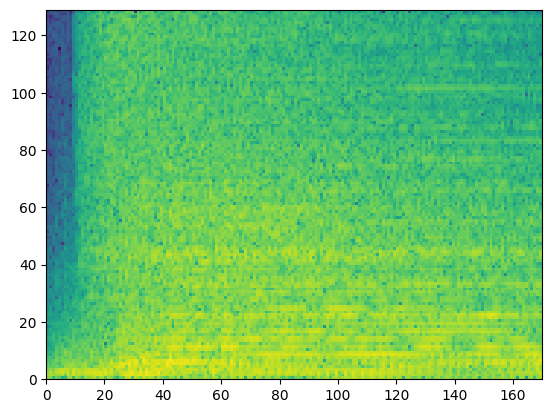

In [43]:
log_spec = np.log(spectogram.numpy().T)
plt.pcolormesh(log_spec)